# Conway's Game of Life
Conway's Game of Life is a cellular automata simulation that follows simple rules to create visual patterns.
The *game* is played on a two-dimensional board (a grid) of cells. Each cell can be either black or white.
The board evolves according to the following rules:
- Living (black) cells with two or three neighbors stay alive in the next step of the simulation;
- Dead (white) cells with exactly three living neighbors become alive in the next step of the simulation;
- Any other cell dies or stays dead in the next step of the simulation.

The living or dead state of the cells in the next step of the simulation depends entirely on their current state. There is no *memory* whatsoever for the grid cells beside the current board status, which rules the living or dead state of the cells in the next step of the simulation.

Before starting to code your solution, let's highlight a few aspects you may want to brainstorm in advance:
- Which format is most suitable representation for our data?
- How do we populate the grid in the beginning?
- Which parts of the code could be factored out in separate functions?
- How could we handle the main game-loop?

The most suitable format to represent this problem is that of matrix of the size of the two-dimensional board, which are entered by the users when the program is launched. Within it, it must be filled with two random numbers, 0 or 1, which respectively represent the vital status of a cell. To avoid infinite iterations a while-loop has been chosen, in order to stop cell evolution in case there are no more living cells, if the cells keeps the same configuration for two consecutive steps and the number of steps is higher than a fixed number. For this purpose, two functions are created. The first one is called **grid_formation**, which receives as input the size of grid and of cell, set as three in order to reduce nuber of steps. Checked that information given in input are numerical and that both the number of rows and columns is higher than cell size, two parameters are randomly set to place the cell inside the grid and a the grid is created. To create the cell, a 3x3 section of the grid is selected and randomly composed of 0, which stands for dead cells, and 1, which stands for living cells. To these values, it is associated a color with which displays data as image, coloring white cells which contains 0 and coloring black cells which contains 1. The function returns the grid, which will be used as input parameter for the second function. 

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

def grid_formation(c,r):
    size_cells=int(input('Insert the initial size of the cells: '))
    if c.isnumeric() and r.isnumeric():
        c=int(c)
        r=int(r)
        if c>size_cells and r>size_cells:
            p=random.randint(0,c-1-size_cells)
            t=random.randint(0,r-1-size_cells)
            a=[None]*int(r)


            for i in range(int(len(a))):
                b=[None]*int(c)
                for j in range(int(len(b))):
                    b[j]=0
                a[i]=b    




            grid=np.array(a)
            cell=grid[p:p+size_cells,t:t+size_cells]
            # cella=(cell[p:p+3,t:t+3])

            for i in range(size_cells):
                b=cell[i]
                for j in range(size_cells):
                      b[j]=random.randint(0,1)
                      cell[i,j]=b[j]

            for i in range(size_cells):
                for j in range(size_cells):
                    grid[p+i,t+j]=cell[i,j]


            plt.imshow(grid,cmap='gray_r')
            plt.show() 
            return grid
        else:
            print(f'Both number of columns and rows must be higher than cell size.')
            
    else:
        print(f'You must insert numerical values.')


The second function is called **cell_evolution**, which describes the evolution of the cell following the rules mentioned in the introdction. Each vital state in the grid is selected and, according to its position on the grid, cells around it are selected. Summing the values around the vital state it is possible to understand how many cells are alive, and so to define the vital state the portion of the grid in the next step. Once the whole matrix has been analyzed, the new configuration is represented with the function previously used. This function returns the number of steps until the stop of the simulation and the final size of the cells.

In [6]:
def cell_evolution (c,r,grid):
    if c.isnumeric() and r.isnumeric():
        c=int(c)
        r=int(r)
        old_configuration=np.zeros((c,r))
        new_configuration=np.ones((c,r))
        ev=0
        new_life_cond=c*r+1
        max_ev=int(input('Insert the maximum number of steps: '))

        while (new_life_cond!=0) and np.array_equal(old_configuration,new_configuration)==False and ev<=max_ev:
            if ev==0:
                for i in range(c):
                    for j in range(r):
                        old_configuration[i,j]=grid[i,j]
            else:
                for i in range(c):
                    for j in range(r):
                        old_configuration[i,j]=new_configuration[i,j]
            i=0
            j=0
            for i in range(c):
                for j in range(r):
                    unit=grid[i,j]
                    if i==0: 
                        if j==0:
                          cell_old=grid[i:i+2,j:j+2]
                        if j==r-1:
                          cell_old=grid[i:i+2,j-1:j+1]
                        if j>0 and j<r-1:
                          cell_old=grid[i:i+2,j-1:j+2]
                    if i==c-1:
                        if j==0:
                          cell_old=grid[i-2:i,j:j+2]
                        if j==r-1:
                          cell_old=grid[i-2:i,j-1:j+1]
                        if j>0 and j<r-1:
                          cell_old=grid[i-2:i,j-1:j+2]
                    if i>0 and i<c-1:
                        if j==0:
                          cell_old=grid[i-1:i+2,j:j+2]
                        if j==r-1:
                          cell_old=grid[i-1:i+2,j-1:j+1]
                        if j>0 and j<r-1:
                          cell_old=grid[i-1:i+2,j-1:j+2]

                    life_cond=cell_old.sum()-unit
                    if unit==0:
                            if life_cond==3:
                                unit=1
                            else:
                                unit=0
                    else:
                            if life_cond==2 or life_cond==3:
                                unit=1
                            else:
                                unit=0
                    grid[i,j]=unit

                    new_configuration=grid



            plt.imshow(grid,cmap='gray_r')
            plt.show()
            new_life_cond=grid.sum()
            ev=ev+1

        return ev,old_configuration,new_configuration

At this point, inserting the information of the grid dimension, it is possible to lauch the program.

Insert the number of columns: 10
Insert the number of rows: 10
Insert the initial size of the cells: 3


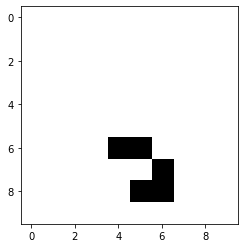

Insert the maximum number of steps: 100


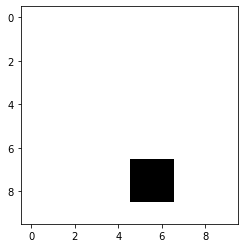

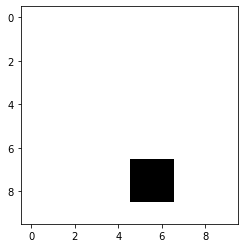

In [7]:
c=input('Insert the number of columns: ')
r=input('Insert the number of rows: ')
size_cells=3


grid=grid_formation(c,r)
ev,old_configuration,new_configuration=cell_evolution(c,r,grid)


Downstream the program execution, it is interesting to get some information the number of the steps which leads to the end of the program.

In [8]:
if np.array_equal(old_configuration,new_configuration)==True:
    print(f'The cell keeps the same size after {ev} steps.')
elif ev<100:
    print(f'The cell manages to survive for {ev} steps.')
else:
    print(f'The cell manages to survive for more than 100 steps.')


The cell keeps the same size after 2 steps.
